In [98]:
print("Hello World!")

Hello World!


In [99]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures

## Hourly Ride Prediction 

Loading Dataset

In [100]:
hourly=pd.read_csv("hourly_ml.csv")

In [101]:
hourly.head()

,Casual,Date,Hour,Registered,Total_rides,Relativehumidity_2m (%),Temperature_2m (°C),Weathercode (wmo code),Windspeed_10m (km/h),Weather,...,Cloudy Weather,Drizzle Weather,Rainy Weather,Snowy Weather,Season,Weekday,Year,Workingday,Month,Minutes
0,20.0,2021-01-01,0,26.0,46.0,90,2.4,1,10.2,Clear,...,0,0,0,0,Winter,Fri.,2021,Yes,Jan.,0
1,23.0,2021-01-01,1,23.0,46.0,88,1.8,1,10.0,Clear,...,0,0,0,0,Winter,Fri.,2021,Yes,Jan.,60
2,20.0,2021-01-01,2,28.0,48.0,87,1.1,2,10.1,Cloudy,...,1,0,0,0,Winter,Fri.,2021,Yes,Jan.,120
3,9.0,2021-01-01,3,7.0,16.0,81,1.6,2,10.6,Cloudy,...,1,0,0,0,Winter,Fri.,2021,Yes,Jan.,180
4,7.0,2021-01-01,4,5.0,12.0,77,1.6,2,9.9,Cloudy,...,1,0,0,0,Winter,Fri.,2021,Yes,Jan.,240


In [102]:
hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26269 entries, 0 to 26268
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Casual                   26269 non-null  float64
 1   Date                     26269 non-null  object 
 2   Hour                     26269 non-null  int64  
 3   Registered               26269 non-null  float64
 4   Total_rides              26269 non-null  float64
 5   Relativehumidity_2m (%)  26269 non-null  int64  
 6   Temperature_2m (°C)      26269 non-null  float64
 7   Weathercode (wmo code)   26269 non-null  int64  
 8   Windspeed_10m (km/h)     26269 non-null  float64
 9   Weather                  26269 non-null  object 
 10  Clear Weather            26269 non-null  int64  
 11  Cloudy Weather           26269 non-null  int64  
 12  Drizzle Weather          26269 non-null  int64  
 13  Rainy Weather            26269 non-null  int64  
 14  Snowy Weather         

In [103]:
hourly.isnull().sum()

Casual                     0
Date                       0
Hour                       0
Registered                 0
Total_rides                0
Relativehumidity_2m (%)    0
Temperature_2m (°C)        0
Weathercode (wmo code)     0
Windspeed_10m (km/h)       0
Weather                    0
Clear Weather              0
Cloudy Weather             0
Drizzle Weather            0
Rainy Weather              0
Snowy Weather              0
Season                     0
Weekday                    0
Year                       0
Workingday                 0
Month                      0
Minutes                    0
dtype: int64

In [104]:
hourly.describe().T

,count,mean,std,min,25%,50%,75%,max
Casual,26269.0,159.930070,167.330426,0.0,28.0,105.0,237.0,1206.0
Hour,26269.0,11.503864,6.921180,0.0,6.0,12.0,18.0,23.0
Registered,26269.0,247.165632,225.283539,0.0,55.0,203.0,371.0,1534.0
Total_rides,26269.0,407.095702,373.005409,1.0,85.0,319.0,616.0,2262.0
Relativehumidity_2m (%),26269.0,62.962846,22.726160,5.0,46.0,64.0,82.0,100.0
Temperature_2m (°C),26269.0,14.419590,10.282328,-14.6,6.2,14.8,22.7,41.5
Weathercode (wmo code),26269.0,7.223838,17.623401,0.0,0.0,1.0,2.0,75.0
Windspeed_10m (km/h),26269.0,10.170330,5.260753,0.0,6.5,9.2,12.9,40.1
Clear Weather,26269.0,0.841638,0.365087,0.0,1.0,1.0,1.0,1.0
Cloudy Weather,26269.0,0.095436,0.293821,0.0,0.0,0.0,0.0,1.0


Graphing each independent variable against the variable 

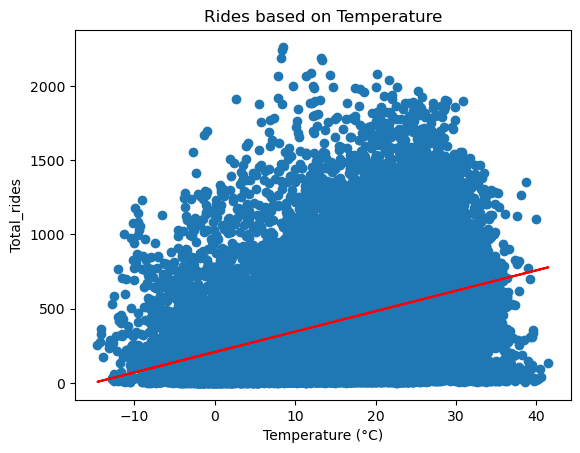

In [105]:

# Temperature
# plotting Temperature against Total rides
plt.scatter(x=hourly["Temperature_2m (°C)"], y=hourly["Total_rides"])
plt.title("Rides based on Temperature")
plt.ylabel("Total_rides")
plt.xlabel("Temperature (°C)")

# Fit a linear regression line
x = hourly["Temperature_2m (°C)"]
y = hourly["Total_rides"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')  # adding the linear line

plt.show()


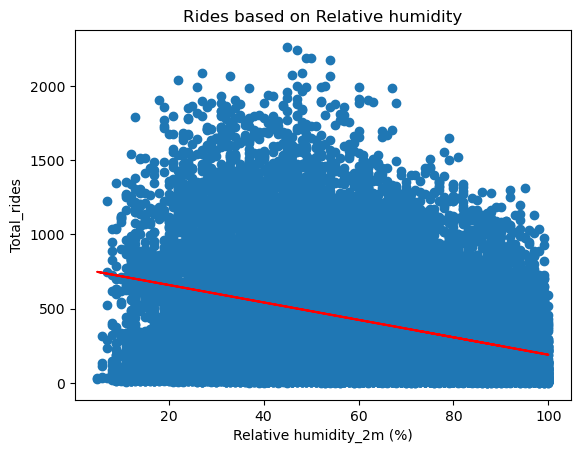

In [106]:

#Relativehumidity_2m (%)

# plotting Relativehumidity_2m (%) against Total rides
plt.scatter(x=hourly["Relativehumidity_2m (%)"], y=hourly["Total_rides"])
plt.title("Rides based on Relative humidity")
plt.ylabel("Total_rides")
plt.xlabel("Relative humidity_2m (%)")

# Fit a linear regression line
x = hourly["Relativehumidity_2m (%)"]
y = hourly["Total_rides"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')  # adding the linear line

plt.show()

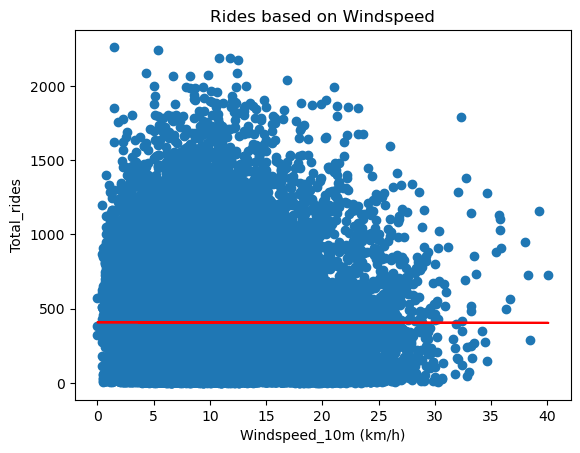

In [107]:
# Windspeed
# plotting Windspeed_10m (km/h) against Total rides
plt.scatter(x=hourly["Windspeed_10m (km/h)"], y=hourly["Total_rides"])
plt.title("Rides based on Windspeed")
plt.ylabel("Total_rides")
plt.xlabel("Windspeed_10m (km/h)")

# Fit a linear regression line
x = hourly["Windspeed_10m (km/h)"]
y = hourly["Total_rides"]
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color='red')  # adding the linear line

plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


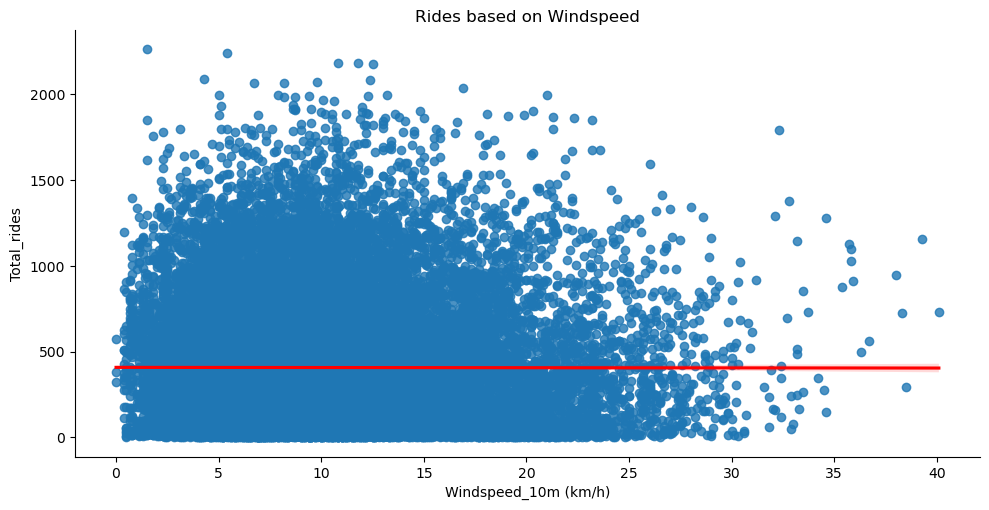

In [108]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting using Seaborn's lmplot with red line
sns.lmplot(x="Windspeed_10m (km/h)", y="Total_rides", data=hourly, aspect=2, line_kws={'color': 'red'})
plt.title("Rides based on Windspeed")
plt.ylabel("Total_rides")
plt.xlabel("Windspeed_10m (km/h)")
plt.show()


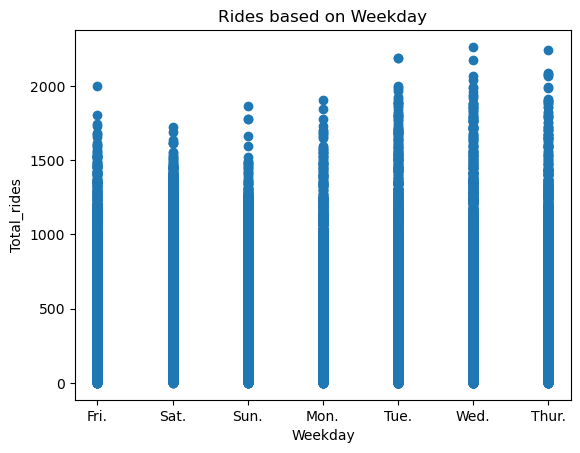

In [109]:
# plotting Weekdays against Total rides
plt.scatter(x=hourly["Weekday"], y=hourly["Total_rides"],)
plt.title("Rides based on Weekday")
plt.ylabel("Total_rides")
plt.xlabel("Weekday")

# Fit a linear regression line
#x = hourly["Weekday"]
#y = hourly["Total_rides"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x + b, color='red')  # adding the linear line

plt.show()

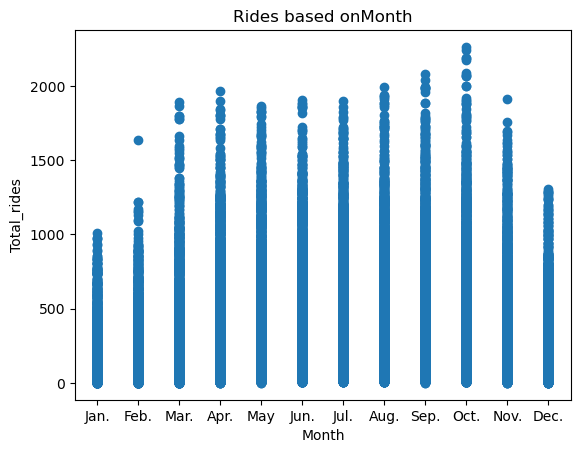

In [110]:
# plotting Months against Total rides
plt.scatter(x=hourly["Month"], y=hourly["Total_rides"])
plt.title("Rides based onMonth")
plt.ylabel("Total_rides")
plt.xlabel("Month")

# Fit a linear regression line
#x = hourly["Month"]
#y = hourly["Total_rides"]
#m, b = np.polyfit(x, y, 1)
#plt.plot(x, m*x + b, color='red')  # adding the linear line

plt.show()

## Data preparation

Dropping irrelevant columns

In [111]:
#Dropping some irrelevant columns

columns_to_drop_2 = ["Casual", "Date", "Registered","Weather","Clear Weather",	"Cloudy Weather",	"Drizzle Weather",	"Rainy Weather",	"Snowy Weather"	,"Weathercode (wmo code)", "Year", "Workingday", "Minutes", "Season"]
hourly.drop(columns_to_drop_2, axis=1, inplace=True)

In [112]:
hourly.head()

,Hour,Total_rides,Relativehumidity_2m (%),Temperature_2m (°C),Windspeed_10m (km/h),Weekday,Month
0,0,46.0,90,2.4,10.2,Fri.,Jan.
1,1,46.0,88,1.8,10.0,Fri.,Jan.
2,2,48.0,87,1.1,10.1,Fri.,Jan.
3,3,16.0,81,1.6,10.6,Fri.,Jan.
4,4,12.0,77,1.6,9.9,Fri.,Jan.


In [113]:
hourly.shape

(26269, 7)

Encoding

In [114]:
# Define columns to encode
columns_to_encode_2 = [ "Month","Weekday"]

# Use get_dummies() to encode these columns
encoded_hourly = pd.get_dummies(hourly, columns=columns_to_encode_2)

# Display the encoded DataFrame
encoded_hourly.head(2)


,Hour,Total_rides,Relativehumidity_2m (%),Temperature_2m (°C),Windspeed_10m (km/h),Month_Apr.,Month_Aug.,Month_Dec.,Month_Feb.,Month_Jan.,...,Month_Nov.,Month_Oct.,Month_Sep.,Weekday_Fri.,Weekday_Mon.,Weekday_Sat.,Weekday_Sun.,Weekday_Thur.,Weekday_Tue.,Weekday_Wed.
0,0,46.0,90,2.4,10.2,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False
1,1,46.0,88,1.8,10.0,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,False


Converting to integer format

In [115]:
# Convert boolean encoded data to integer format
encoded_hourly_int = encoded_hourly.astype(int)


Data Seperation as X and y

In [116]:
#dependent variable
y=encoded_hourly_int["Total_rides"]
# independent varibable
X=encoded_hourly_int.drop("Total_rides", axis=1)

print(y.shape)
print(X.shape)

(26269,)
(26269, 23)


Data Splitting

In [117]:
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Scaling

In [118]:
# Initialize the scaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model Building

In [119]:
lr=LinearRegression()
lr.fit(X_train_scaled,y_train)

LinearRegression()

Applying the model to make prediction

In [120]:
y_pred = lr.predict(X_test_scaled)
y_train_pred=lr.predict(X_train_scaled)

In [121]:
y_pred

array([741.66764293, 437.24453092, 621.9595843 , ..., 174.73009044,
       827.88289043, 236.73109292])

Model Evaluation

Linear regression

In [122]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
lr_test_r2=r2_score(y_test,y_pred)
print(mse)
print(lr_test_r2)

84827.69883564301
0.38720818082573205


Polynomial regression 

In [123]:
# Polynomial features transformation
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)

# Train polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, y_train)

# Make predictions on the training data
y_train_predicted = poly_reg.predict(X_train_poly)

# Evaluate model performance on training data
mse_train = mean_squared_error(y_train, y_train_predicted)
r2_train = r2_score(y_train, y_train_predicted)
print("Training Set - Mean Squared Error:", mse_train)
print("Training Set - R2 Score:", r2_train)

# Visualize the polynomial regression model
#plt.scatter(X_train, y_train, color='blue', label='Training data')
#plt.plot(X_train, y_train_predicted, color='red', label='Polynomial regression')
#plt.title('Polynomial Regression')
#plt.xlabel('X')
#plt.ylabel('y')
#plt.legend()
#plt.show()

# Transform and Make predictions on the testing data
X_test_poly = poly_features.transform(X_test)
y_test_predicted = poly_reg.predict(X_test_poly)

# Evaluate model performance on test data
mse_test = mean_squared_error(y_test, y_test_predicted)
r2_test = r2_score(y_test, y_test_predicted)
print("Test Set - Mean Squared Error:", mse_test)
print("Test Set - R2 Score:", r2_test)

Training Set - Mean Squared Error: 40206.05028988678
Training Set - R2 Score: 0.7113749843664233
Test Set - Mean Squared Error: 39679.363596691874
Test Set - R2 Score: 0.7133579038940374


Other Algorithms

In [124]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Define a list of regression algorithms
algorithms = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    RandomForestRegressor(),
    GradientBoostingRegressor()
]

# Iterate over each algorithm, train it, make predictions, and evaluate performance
for algorithm in algorithms:
    # Train the algorithm
    algorithm.fit(X_train, y_train)
    
    # Make predictions
    y_pred = algorithm.predict(X_test)
    
    # Evaluate performance (using Mean Squared Error in this example)
    mse = mean_squared_error(y_test, y_pred)
    r2=r2_score(y_test,y_pred)
    
    # Print the name of the algorithm and its performance
    print(f"{algorithm.__class__.__name__} - MSE: {mse}")
    print(f"{algorithm.__class__.__name__} - R2: {r2}")
    print(" ") # print an empty line


LinearRegression - MSE: 84827.69883564301
LinearRegression - R2: 0.38720818082573205
 
Ridge - MSE: 84827.34571264421
Ridge - R2: 0.3872107317718003
 
Lasso - MSE: 84716.79785059058
Lasso - R2: 0.38800932499575336
 
RandomForestRegressor - MSE: 17528.55575863516
RandomForestRegressor - R2: 0.8733744317213717
 
GradientBoostingRegressor - MSE: 31239.398430973335
GradientBoostingRegressor - R2: 0.7743278662843759
 


## Peak Hours for Working days and Weekends

Data Frame for Morning Rush during working days

In [125]:

# Filter for peak hours from 5 AM to 9 AM
peak_hours = hourly[(hourly['Hour'] >= 5) & (hourly['Hour'] <= 9)]

# Filter for working days (Monday to Friday)
morning_working_days = peak_hours[peak_hours['Weekday'].isin(['Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.'])]

# resetting index
morning_working_days.reset_index(drop=True, inplace=True)

#display
morning_working_days.head(10)

,Hour,Total_rides,Relativehumidity_2m (%),Temperature_2m (°C),Windspeed_10m (km/h),Weekday,Month
0,5,14.0,75,1.4,8.7,Fri.,Jan.
1,6,26.0,72,1.4,8.9,Fri.,Jan.
2,7,27.0,71,1.4,7.9,Fri.,Jan.
3,8,55.0,71,1.4,7.1,Fri.,Jan.
4,9,76.0,70,1.6,7.2,Fri.,Jan.
5,5,29.0,96,1.3,9.7,Mon.,Jan.
6,6,62.0,96,0.9,8.7,Mon.,Jan.
7,7,159.0,95,0.6,8.3,Mon.,Jan.
8,8,172.0,95,0.4,7.4,Mon.,Jan.
9,9,120.0,94,0.7,7.1,Mon.,Jan.


Data frame for evening Rush during working days

In [126]:

# Filter for peak hours from 17:00 to 21:00
peak_hours = hourly[(hourly['Hour'] >= 17) & (hourly['Hour'] <= 21)]

# Filter for working days (Monday to Friday)
evening_working_days = peak_hours[peak_hours['Weekday'].isin(['Mon.', 'Tue.', 'Wed.', 'Thu.', 'Fri.'])]

# resetting index
evening_working_days.reset_index(drop=True, inplace=True)

#display
evening_working_days.head(10)

,Hour,Total_rides,Relativehumidity_2m (%),Temperature_2m (°C),Windspeed_10m (km/h),Weekday,Month
0,17,19.0,95,2.5,8.7,Fri.,Jan.
1,18,15.0,96,2.7,8.5,Fri.,Jan.
2,19,9.0,97,3.0,6.1,Fri.,Jan.
3,20,16.0,97,3.5,5.0,Fri.,Jan.
4,21,14.0,98,4.1,3.7,Fri.,Jan.
5,17,291.0,65,7.3,4.4,Mon.,Jan.
6,18,229.0,70,6.7,4.5,Mon.,Jan.
7,19,141.0,77,5.9,4.8,Mon.,Jan.
8,20,93.0,83,5.1,5.3,Mon.,Jan.
9,21,74.0,86,4.7,5.4,Mon.,Jan.


Data Frame for Rush hours during Weekends

In [127]:

# Filter for peak hours from 10:00 to 16:00 at weekend
peak_hours = hourly[(hourly['Hour'] >= 10) & (hourly['Hour'] <= 16)]

# Filter for working days (Monday to Friday)
peak_weekend = peak_hours[peak_hours['Weekday'].isin(['Sat.', 'Sun.'])]

# resetting index
peak_weekend.reset_index(drop=True, inplace=True)

#display
peak_weekend.head(10)

,Hour,Total_rides,Relativehumidity_2m (%),Temperature_2m (°C),Windspeed_10m (km/h),Weekday,Month
0,10,257.0,97,7.7,8.5,Sat.,Jan.
1,11,415.0,93,9.5,9.4,Sat.,Jan.
2,12,632.0,80,11.2,11.2,Sat.,Jan.
3,13,744.0,66,11.9,14.9,Sat.,Jan.
4,14,831.0,62,11.8,19.1,Sat.,Jan.
5,15,756.0,63,12.4,17.0,Sat.,Jan.
6,16,590.0,63,11.8,15.9,Sat.,Jan.
7,10,148.0,93,3.5,9.4,Sun.,Jan.
8,11,176.0,92,3.9,11.8,Sun.,Jan.
9,12,175.0,91,4.4,10.8,Sun.,Jan.


## Encoding of Peak hours Data frame

In [128]:
#morning rush during working days
# Define columns to encode
columns_to_encode_3 = [ "Month","Weekday"]

# Use get_dummies() to encode these columns
encoded_morning_working_days = pd.get_dummies(morning_working_days, columns=columns_to_encode_3)


#Evening rush during working days
# Define columns to encode
columns_to_encode_4 = [ "Month","Weekday"]

# Use get_dummies() to encode these columns
encoded_evening_working_days = pd.get_dummies(evening_working_days, columns=columns_to_encode_4)


#peak rush during weekend
# Define columns to encode
columns_to_encode_5 = [ "Month","Weekday"]

# Use get_dummies() to encode these columns
encoded_peak_weekend = pd.get_dummies(peak_weekend, columns=columns_to_encode_5)





Converting to integer format

In [129]:
# Convert boolean encoded data to integer format

encoded_morning_working_days_int = encoded_morning_working_days.astype(int)

encoded_evening_working_days_int = encoded_evening_working_days.astype(int)

encoded_peak_weekend_int = encoded_peak_weekend.astype(int)



Data Seperation as X and y

In [130]:
# morning rush working day
#dependent variable
morning_y=encoded_morning_working_days_int["Total_rides"]

# independent varibable
morning_X=encoded_morning_working_days_int.drop("Total_rides", axis=1)
print(morning_X.shape)
print(morning_y.shape)
print(" ") #empty line

# evening rush working day
#dependent variable
evening_y=encoded_evening_working_days_int["Total_rides"]

# independent varibable
evening_X=encoded_evening_working_days_int.drop("Total_rides", axis=1)
print(evening_X.shape)
print(evening_y.shape)
print(" ") #empty line

# Peak hours weekend
#dependent variable
peak_weekend_y=encoded_peak_weekend_int["Total_rides"]

# independent varibable
peak_weekend_X=encoded_peak_weekend_int.drop("Total_rides", axis=1)
print(peak_weekend_X.shape)
print(peak_weekend_y.shape)

(3125, 20)
(3125,)
 
(3125, 20)
(3125,)
 
(2198, 18)
(2198,)


Data Spliting

In [131]:
## morning rush hour
morning_X_train, morning_X_test,morning_y_train, morning_y_test = train_test_split(morning_X, morning_y, test_size=0.2, random_state=42)

## eveninng rush hour
evening_X_train, evening_X_test,evening_y_train, evening_y_test = train_test_split(evening_X, evening_y, test_size=0.2, random_state=42)

# Peak hours weekend 
peak_weekend_X_train, peak_weekend_X_test,peak_weekend_y_train, peak_weekend_y_test = train_test_split(peak_weekend_X, peak_weekend_y, test_size=0.2, random_state=42)

## Model

Linear Regression for moring rush during working day

In [132]:
lr_morning=LinearRegression()
lr_morning.fit(morning_X_train,morning_y_train)

LinearRegression()

Predict

In [133]:
morning_y_pred = lr_morning.predict(morning_X_test)


Evaluate

In [134]:
# Evaluate the morning_y_pred
mse = mean_squared_error(morning_y_test, morning_y_pred)
lr_test_r2=r2_score(morning_y_test,morning_y_pred)
print(mse)
print(lr_test_r2)

40714.871140134586
0.5130444025126775


Polynomial regresion for Morning rush during working day

In [135]:

# Polynomial features transformation
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly_features.fit_transform(morning_X_train)

# Train polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly, morning_y_train)

# Make predictions on the training data
y_train_predicted = poly_reg.predict(X_train_poly)

# Evaluate model performance on training data
mse_train = mean_squared_error(morning_y_train, y_train_predicted)
r2_train = r2_score(morning_y_train, y_train_predicted)
print("Training Set - Mean Squared Error:", mse_train)
print("Training Set - R2 Score:", r2_train)

# Visualize the polynomial regression model
#plt.scatter(X_train, y_train, color='blue', label='Training data')
#plt.plot(X_train, y_train_predicted, color='red', label='Polynomial regression')
#plt.title('Polynomial Regression')
#plt.xlabel('X')
#plt.ylabel('y')
#plt.legend()
#plt.show()

# Transform and Make predictions on the testing data
X_test_poly = poly_features.transform(morning_X_test)
y_test_predicted = poly_reg.predict(X_test_poly)

# Evaluate model performance on test data
mse_test = mean_squared_error(morning_y_test, y_test_predicted)
r2_test = r2_score(morning_y_test, y_test_predicted)
print("Test Set - Mean Squared Error:", mse_test)
print("Test Set - R2 Score:", r2_test)

Training Set - Mean Squared Error: 15776.641949506027
Training Set - R2 Score: 0.8321582663845449
Test Set - Mean Squared Error: 20486.534293738587
Test Set - R2 Score: 0.7549781623251131


Linear Regression for Evening rush hour during working days

In [136]:
lr_evening=LinearRegression()
lr_evening.fit(evening_X_train,evening_y_train)

LinearRegression()

Predict

In [137]:
# make prediction
evening_y_pred = lr_evening.predict(evening_X_test)


Evaluate

In [138]:
# Evaluate the morning_y_pred
mse = mean_squared_error(evening_y_test, evening_y_pred)
lr_test_r2=r2_score(evening_y_test,evening_y_pred)
print(mse)
print(lr_test_r2)

72232.63888822256
0.6433390844792706


Polynomial regresion for Evening rush during working day

In [139]:

# Polynomial features transformation
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly_evening = poly_features.fit_transform(evening_X_train)

# Train polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly_evening, evening_y_train)

# Make predictions on the training data
y_train_predicted_evening = poly_reg.predict(X_train_poly_evening)

# Evaluate model performance on training data
mse_train = mean_squared_error(evening_y_train, y_train_predicted_evening)
r2_train = r2_score(evening_y_train, y_train_predicted_evening)
print("Training Set - Mean Squared Error:", mse_train)
print("Training Set - R2 Score:", r2_train)

# Visualize the polynomial regression model
#plt.scatter(X_train, y_train, color='blue', label='Training data')
#plt.plot(X_train, y_train_predicted_evening, color='red', label='Polynomial regression')
#plt.title('Polynomial Regression')
#plt.xlabel('X')
#plt.ylabel('y')
#plt.legend()
#plt.show()

# Transform and Make predictions on the testing data
X_test_poly_evening = poly_features.transform(evening_X_test)
y_test_predicted_evening = poly_reg.predict(X_test_poly_evening)

# Evaluate model performance on test data
mse_test = mean_squared_error(evening_y_test, y_test_predicted_evening)
r2_test = r2_score(evening_y_test, y_test_predicted_evening)
print("Test Set - Mean Squared Error:", mse_test)
print("Test Set - R2 Score:", r2_test)

Training Set - Mean Squared Error: 30711.90604282512
Training Set - R2 Score: 0.8423137991134295
Test Set - Mean Squared Error: 46066.27059578055
Test Set - R2 Score: 0.7725399694902237


Linear Regression for Peak hours during weekends

In [140]:
lr_weekend=LinearRegression()
lr_weekend.fit(peak_weekend_X_train,peak_weekend_y_train)

LinearRegression()

Predict

In [141]:
# make prediction
weekend_y_pred = lr_weekend.predict(peak_weekend_X_test)


Evaluate

In [142]:
# Evaluate the weekend_y_pred
mse = mean_squared_error(peak_weekend_y_test, weekend_y_pred)
lr_test_r2=r2_score(peak_weekend_y_test,weekend_y_pred)
print(mse)
print(lr_test_r2)

45551.840727304516
0.6253642688237097


Polynomial regresion for Peak hours during weekends

In [143]:

# Polynomial features transformation
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly_weekend = poly_features.fit_transform(peak_weekend_X_train)

# Train polynomial regression model
poly_reg = LinearRegression()
poly_reg.fit(X_train_poly_weekend, peak_weekend_y_train)

# Make predictions on the training data
y_train_predicted_weekend = poly_reg.predict(X_train_poly_weekend)

# Evaluate model performance on training data
mse_train = mean_squared_error(peak_weekend_y_train, y_train_predicted_weekend)
r2_train = r2_score(peak_weekend_y_train, y_train_predicted_weekend)
print("Training Set - Mean Squared Error:", mse_train)
print("Training Set - R2 Score:", r2_train)

# Visualize the polynomial regression model
#plt.scatter(X_train, y_train, color='blue', label='Training data')
#plt.plot(X_train, y_train_predicted_weekend, color='red', label='Polynomial regression')
#plt.title('Polynomial Regression')
#plt.xlabel('X')
#plt.ylabel('y')
#plt.legend()
#plt.show()

# Transform and Make predictions on the testing data
X_test_poly_weekend = poly_features.transform(peak_weekend_X_test)
y_test_predicted_weekend = poly_reg.predict(X_test_poly_weekend)

# Evaluate model performance on test data
mse_test = mean_squared_error(peak_weekend_y_test, y_test_predicted_weekend)
r2_test = r2_score(peak_weekend_y_test, y_test_predicted_weekend)
print("Test Set - Mean Squared Error:", mse_test)
print("Test Set - R2 Score:", r2_test)

Training Set - Mean Squared Error: 23726.869334041174
Training Set - R2 Score: 0.8110301760924106
Test Set - Mean Squared Error: 31558.803389555225
Test Set - R2 Score: 0.740448350843309


In [144]:
weekend={}

In [ ]:
Morning_Rush_Working_day = R2 Score: 0.75
                        = Mean Squared Error: 20486.53

Evening__Rush_Working_day= R2 Score: 0.77 
                         =  Mean Squared Error: 46066.27
Peak_hours_weekend= R2 Score: 0.74
                  = Mean Squared Error: 31558.80

In [146]:
import pandas as pd

data = {
    'Time_Period': ['Morning_Rush_Working_day', 'Evening_Rush_Working_day', 'Peak_hours_weekend'],
    'R2_Score': [0.75, 0.77, 0.74],
    'Mean_Squared_Error': [20486.53, 46066.27, 31558.80]
}

df = pd.DataFrame(data)
df


,Time_Period,R2_Score,Mean_Squared_Error
0,Morning_Rush_Working_day,0.75,20486.53
1,Evening_Rush_Working_day,0.77,46066.27
2,Peak_hours_weekend,0.74,31558.80


                     Scenario  R2 Score  Mean Squared Error
0  Morning Rush (Working day)        75            20486.53
1  Evening Rush (Working day)        77            46066.27
2        Peak Hours (Weekend)        74            31558.80


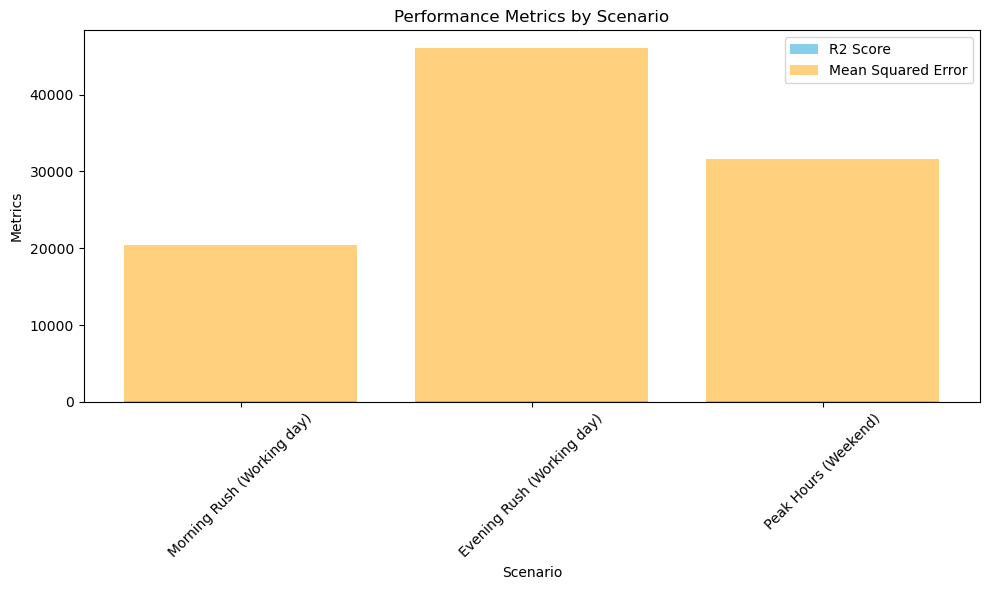

In [151]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a DataFrame from the given data
data = {
    'Scenario': ['Morning Rush (Working day)', 'Evening Rush (Working day)', 'Peak Hours (Weekend)'],
    'R2 Score': [0.75, 0.77, 0.74],
    'Mean Squared Error': [20486.53, 46066.27, 31558.80]
}

df = pd.DataFrame(data)

# Print the DataFrame
print(df)

# Visualizing the data using a bar plot
plt.figure(figsize=(10, 6))
plt.bar(df['Scenario'], df['R2 Score'], color='skyblue', label='R2 Score')
plt.bar(df['Scenario'], df['Mean Squared Error'], color='orange', label='Mean Squared Error', alpha=0.5)
plt.xlabel('Scenario')
plt.ylabel('Metrics')
plt.title('Performance Metrics by Scenario')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


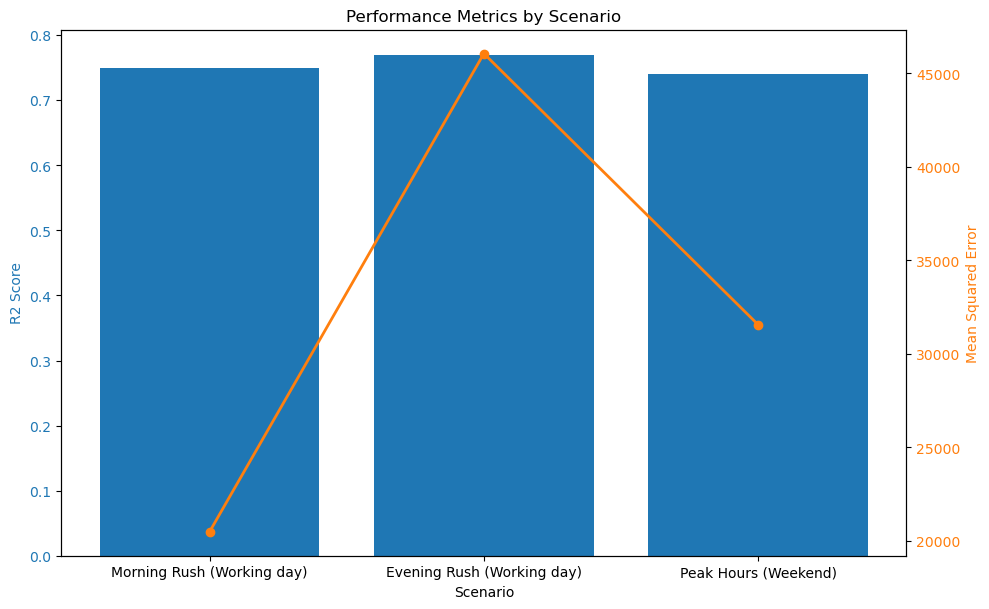

In [152]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a DataFrame from the given data
data = {
    'Scenario': ['Morning Rush (Working day)', 'Evening Rush (Working day)', 'Peak Hours (Weekend)'],
    'R2 Score': [0.75, 0.77, 0.74],
    'Mean Squared Error': [20486.53, 46066.27, 31558.80]
}

df = pd.DataFrame(data)

# Visualizing the data using a combined bar and line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Scenario')
ax1.set_ylabel('R2 Score', color=color)
ax1.bar(df['Scenario'], df['R2 Score'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('Mean Squared Error', color=color)  
ax2.plot(df['Scenario'], df['Mean Squared Error'], color=color, marker='o', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  
plt.title('Performance Metrics by Scenario')
plt.xticks(rotation=45)
plt.show()


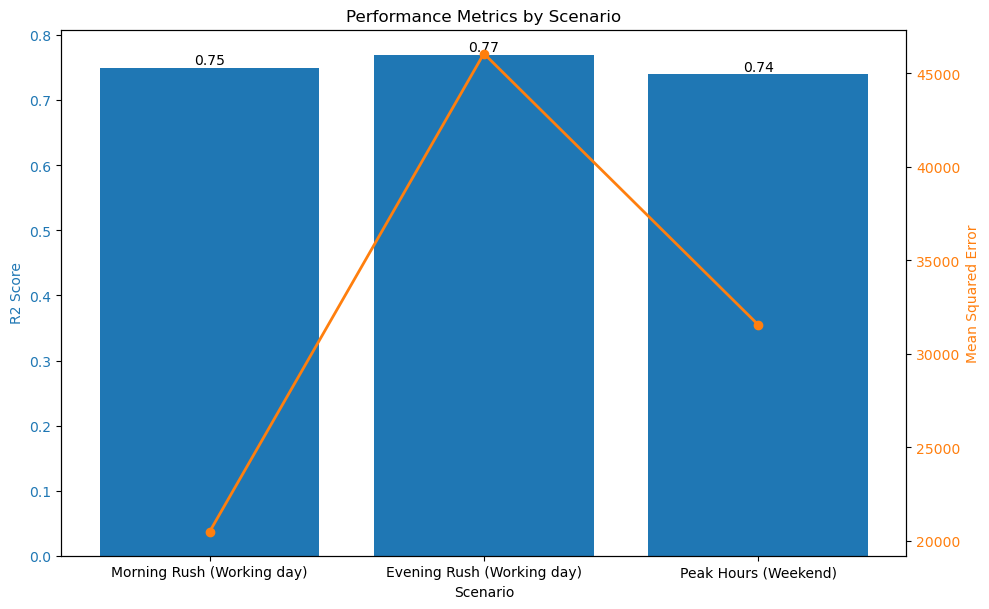

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a DataFrame from the given data
data = {
    'Scenario': ['Morning Rush (Working day)', 'Evening Rush (Working day)', 'Peak Hours (Weekend)'],
    'R2 Score': [0.75, 0.77, 0.74],
    'Mean Squared Error': [20486.53, 46066.27, 31558.80]
}

df = pd.DataFrame(data)

# Visualizing the data using a combined bar and line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:blue'
ax1.set_xlabel('Scenario')
ax1.set_ylabel('R2 Score', color=color)
bars = ax1.bar(df['Scenario'], df['R2 Score'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('Mean Squared Error', color=color)  
ax2.plot(df['Scenario'], df['Mean Squared Error'], color=color, marker='o', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Adding R2 Score labels on top of each bar
for bar, r2_score in zip(bars, df['R2 Score']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{r2_score:.2f}', ha='center', va='bottom')

fig.tight_layout()  
plt.title('Performance Metrics by Scenario')
plt.xticks(rotation=45)
plt.show()


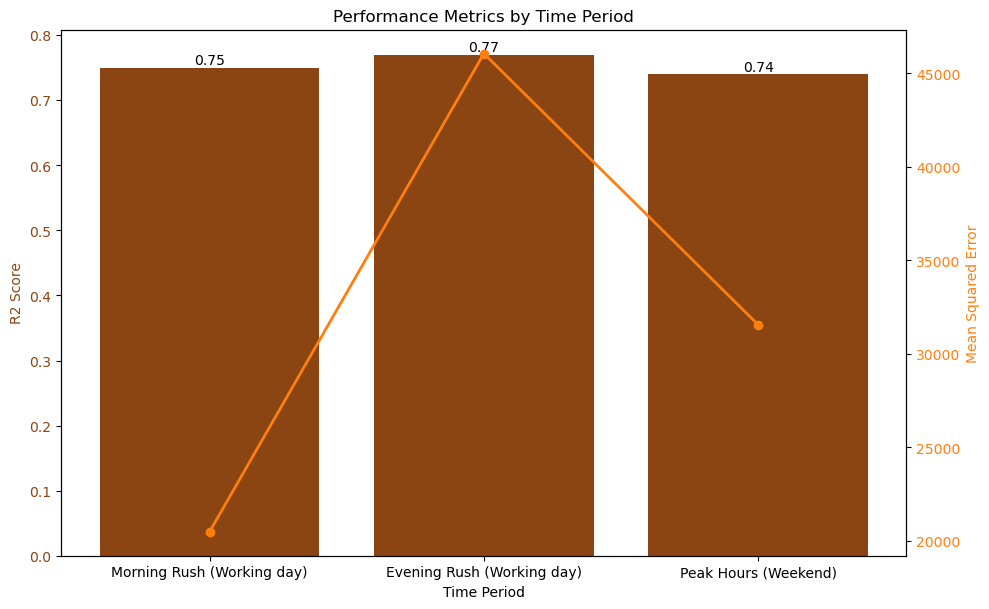

In [157]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a DataFrame from the given data
data = {
    'Scenario': ['Morning Rush (Working day)', 'Evening Rush (Working day)', 'Peak Hours (Weekend)'],
    'R2 Score': [0.75, 0.77, 0.74],
    'Mean Squared Error': [20486.53, 46066.27, 31558.80]
}

df = pd.DataFrame(data)

# Define colors for bars
colors = ['#8B4513', '#8B4513', '#8B4513']

# Visualizing the data using a combined bar and line plot
fig, ax1 = plt.subplots(figsize=(10, 6))

color = '#8B4513'
ax1.set_xlabel('Time Period')
ax1.set_ylabel('R2 Score', color=color)
bars = ax1.bar(df['Scenario'], df['R2 Score'], color=colors)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:orange'
ax2.set_ylabel('Mean Squared Error', color=color)  
ax2.plot(df['Scenario'], df['Mean Squared Error'], color=color, marker='o', linewidth=2)
ax2.tick_params(axis='y', labelcolor=color)

# Adding R2 Score labels on top of each bar
for bar, r2_score in zip(bars, df['R2 Score']):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{r2_score:.2f}', ha='center', va='bottom')

fig.tight_layout()  
plt.title('Performance Metrics by Time Period')
plt.xticks(rotation=45)
plt.show()
